In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
from google.colab import files
# Upload dataset
uploaded = files.upload()

Saving cardekho_dataset.csv to cardekho_dataset (1).csv


In [ ]:
df = pd.read_csv('cardekho_dataset.csv')

In [ ]:
# Handle missing values
for col in ['mileage', 'engine', 'max_power', 'seats', 'selling_price']:
    df[col].fillna(df[col].median(), inplace=True)


<ipython-input-5-68a3ded0e79a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
# Label Encoding
le = LabelEncoder()
for col in ['brand', 'model', 'seller_type', 'fuel_type', 'transmission_type']:
    df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
# Convert vehicle_age to numeric
if 'vehicle_age' in df.columns:
    df['vehicle_age'] = df['vehicle_age'].apply(lambda x: int(x.split()[0]) if isinstance(x, str) else x)

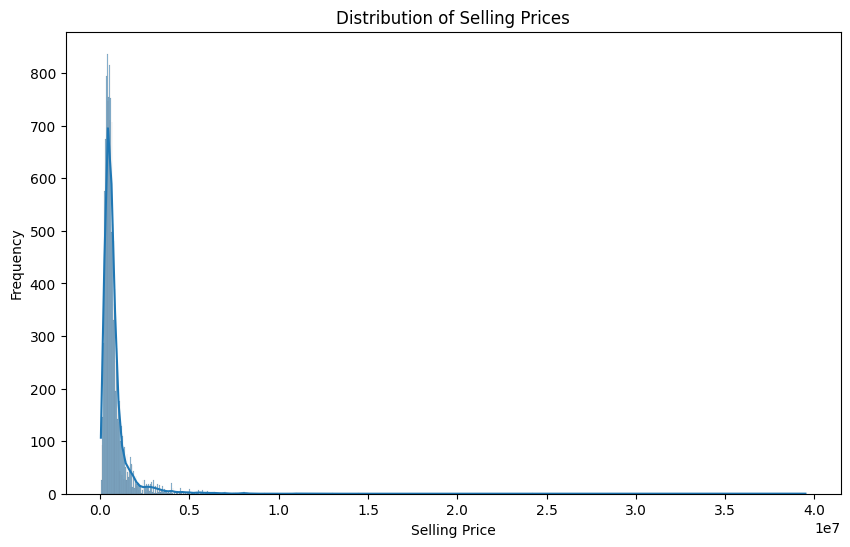

In [ ]:
# Data visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

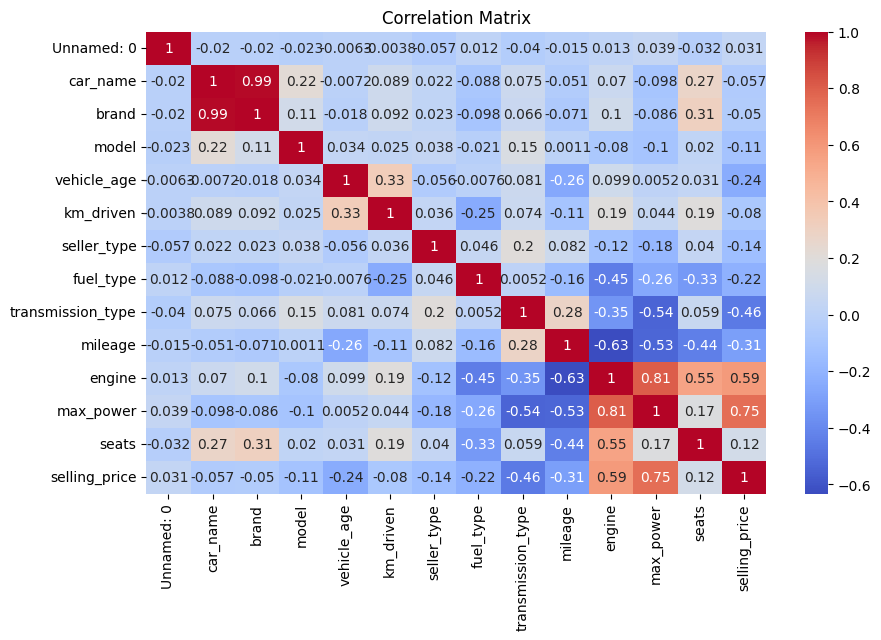

In [ ]:
# Convert all string columns to numerical representations using Label Encoding
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Now you can calculate the correlation matrix and plot the heatmap:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:

# Prepare data
X = df.drop('selling_price', axis=1)
y = df['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# Standardize numeric columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.select_dtypes(include=np.number))
X_test = scaler.transform(X_test.select_dtypes(include=np.number))

In [ ]:
# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:

# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:

# Model Evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Model Evaluation:")
    print("Mean Absolute Error:", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_true, y_pred))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score (Accuracy):", r2_score(y_true, y_pred))
    print("-" * 50)

In [ ]:

evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("Linear Regression", y_test, y_pred_lr)


Random Forest Model Evaluation:
Mean Absolute Error: 95634.00421667207
Mean Squared Error: 46967123043.60201
Root Mean Squared Error: 216718.99557630386
R² Score (Accuracy): 0.9376085824107755
--------------------------------------------------
Linear Regression Model Evaluation:
Mean Absolute Error: 270102.67264506815
Mean Squared Error: 250638500325.57858
Root Mean Squared Error: 500638.0931626943
R² Score (Accuracy): 0.6670502614513374
--------------------------------------------------


In [ ]:

# Create a DataFrame to display the results in matrix form
results_df = pd.DataFrame([rf_metrics, lr_metrics])

# Display the evaluation matrix
print("Model Evaluation Matrix:")
print(results_df)


Model Evaluation Matrix:
      0
0  None
1  None
